### Grain boundaries
$$\gamma = \frac{E_{gb}- n*E_{atom}}{A_{total}}$$

In [1]:
from pyiron import Project
import numpy as np
import matplotlib.pylab as plt
import ase.units

In [2]:
# job_min.list_potentials()

In [3]:
potential =  'FeH-NNIP'

In [4]:
pr = Project("grain_boundaries")
# pr.create.structure.aimsgb.build?

In [5]:
bulk = pr.create.structure.bulk('Fe', crystalstructure='bcc', cubic=True)
job_min = pr.create.job.Lammps('minimise', delete_existing_job=True)
job_min.structure = bulk
job_min.potential = potential
job_min.calc_minimize(pressure=0.0)
job_min.run(delete_existing_job=True)
eFe = job_min.output.energy_tot[-1]/len(bulk)
structure = job_min.get_structure(-1)

The job minimise was saved and received the ID: 10241


In [10]:
supercell = structure.repeat([10,10,10])
print(len(supercell))
job_supercell = pr.create.job.Lammps('supercell', delete_existing_job=True)
job_supercell.structure = supercell
job_supercell.potential = potential
job_supercell.calc_minimize(pressure=[0.0, None, None, None, None, None])
job_supercell.run(delete_existing_job=True)
job_supercell.output.energy_pot

2000
The job supercell was saved and received the ID: 10242


array([-16483.09557258, -16483.09557258])

In [11]:
# 110 symmetric
E_110 = []

gb1 = pr.create.structure.aimsgb.build((1,1,0), 9, (-1,1,-4), structure,
                                      uc_a=3, uc_b=3, add_if_dist=1)
gb2 = pr.create.structure.aimsgb.build((1,1,0), 11, (1,-1,3), structure,
                                      uc_a=4, uc_b=4, add_if_dist=1)
gb3 = pr.create.structure.aimsgb.build((1,1,0), 3, (1,-1,2), structure,
                                      uc_a=5, uc_b=5, add_if_dist=1)
gb4 = pr.create.structure.aimsgb.build((1,1,0), 3, (-1,1,1), structure,
                                      uc_a=6, uc_b=6, add_if_dist=1)
gb5 = pr.create.structure.aimsgb.build((1,1,0), 11, (-3,3,2), structure,
                                      uc_a=3, uc_b=3, add_if_dist=1)
gb6 = pr.create.structure.aimsgb.build((1,1,0), 9, (-2,2,1), structure,
                                      uc_a=4, uc_b=4, add_if_dist=1)
gb7 = pr.create.structure.aimsgb.build((1,1,0), 27, (-5,5,2), structure,
                                      uc_a=2, uc_b=2, add_if_dist=1)

/home/gu.huang/miniconda3/envs/pyiron/lib/python3.12/site-packages/structuretoolkit/build/aimsgb.py:97: UserWarning: `add_if_dist` is deprecated, please use `gap` instead.
  warn("`add_if_dist` is deprecated, please use `gap` instead.")


In [12]:
gb114 = gb1.copy()
gb114 = gb114.repeat([1,2,4])
# gb114.plot3d()
# x

job = pr.create.job.Lammps('gb114', delete_existing_job=True)
job.structure = gb114
job.potential = potential
job.calc_minimize(pressure=[0.0, None, None, None, None, None])
job.run(delete_existing_job=True)

a,b,c = job.get_structure(-1).get_cell()
A = np.linalg.norm(np.cross(b,c))
e = job.output.energy_tot[-1]
egb = (e-len(gb114)*eFe) / (2*A)
print(len(gb114))
e_gb = egb / ase.units.J * (ase.units.m)**2
E_110.append(e_gb)

The job gb114 was saved and received the ID: 10243


/home/gu.huang/miniconda3/envs/pyiron/lib/python3.12/site-packages/pyiron_atomistics/lammps/interactive.py:435: SyntaxWarning: invalid escape sequence '\A'
  """
/home/gu.huang/miniconda3/envs/pyiron/lib/python3.12/site-packages/pyiron_atomistics/lammps/base.py:119: SyntaxWarning: invalid escape sequence '\A'
  """
/home/gu.huang/miniconda3/envs/pyiron/lib/python3.12/site-packages/pyiron_atomistics/lammps/output.py:178: SyntaxWarning: invalid escape sequence '\s'
  sep="\s+",
/home/gu.huang/miniconda3/envs/pyiron/lib/python3.12/site-packages/pyiron_atomistics/lammps/output.py:330: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(StringIO(thermo_lines), sep="\s+", engine="c")


ValueError: could not convert string to float: '###'

In [61]:
gb113 = gb2.copy()
gb113 = gb113.repeat([1,1,4])
# y

job = pr.create.job.Lammps('gb113', delete_existing_job=True)
job.structure = gb113
job.potential = potential
job.calc_minimize(pressure=[None, 0.0, None, None, None, None])
job.run(delete_existing_job=True)

a,b,c = job.get_structure(-1).get_cell()
A = np.linalg.norm(np.cross(a,c))
e = job.output.energy_tot[-1]
egb = (e-len(gb113)*eFe) / (2*A)
print(len(gb113))
e_gb = egb / ase.units.J * (ase.units.m)**2
E_110.append(e_gb)

The job gb113 was saved and received the ID: 10225
1408


In [62]:
gb112 = gb3.copy()
gb112 = gb112.repeat([3,1,4])
# y

job = pr.create.job.Lammps('gb112', delete_existing_job=True)
job.structure = gb112
job.potential = potential
job.calc_minimize(pressure=[None, 0.0, None, None, None, None])
job.run(delete_existing_job=True)

a,b,c = job.get_structure(-1).get_cell()
A = np.linalg.norm(np.cross(a,c))
e = job.output.energy_tot[-1]
egb = (e-len(gb112)*eFe) / (2*A)
print(len(gb112))
e_gb = egb / ase.units.J * (ase.units.m)**2
E_110.append(e_gb)

The job gb112 was saved and received the ID: 10226
1440


In [63]:
gb111 = gb4.copy()
gb111 = gb111.repeat([1,3,4])
# x

job = pr.create.job.Lammps('gb111', delete_existing_job=True)
job.structure = gb111
job.potential = potential
job.calc_minimize(pressure=[0.0, None, None, None, None, None])
job.run(delete_existing_job=True)

a,b,c = job.get_structure(-1).get_cell()
A = np.linalg.norm(np.cross(b,c))
e = job.output.energy_tot[-1]
egb = (e-len(gb111)*eFe) / (2*A)
print(len(gb111))
e_gb = egb / ase.units.J * (ase.units.m)**2
E_110.append(e_gb)

The job gb111 was saved and received the ID: 10227
1728


In [64]:
gb332 = gb5.copy()
gb332 = gb332.repeat([1,2,3])
# x

job = pr.create.job.Lammps('gb332', delete_existing_job=True)
job.structure = gb332
job.potential = potential
job.calc_minimize(pressure=[0.0, None, None, None, None, None])
job.run(delete_existing_job=True)

a,b,c = job.get_structure(-1).get_cell()
A = np.linalg.norm(np.cross(b,c))
e = job.output.energy_tot[-1]
egb = (e-len(gb332)*eFe) / (2*A)
print(len(gb332))
e_gb = egb / ase.units.J * (ase.units.m)**2
E_110.append(e_gb)

The job gb332 was saved and received the ID: 10228
1584


In [65]:
gb221 = gb6.copy()
gb221 = gb221.repeat([1,1,4])
# y

job = pr.create.job.Lammps('gb221', delete_existing_job=True)
job.structure = gb221
job.potential = potential
job.calc_minimize(pressure=[None, 0.0, None, None, None, None])
job.run(delete_existing_job=True)

a,b,c = job.get_structure(-1).get_cell()
A = np.linalg.norm(np.cross(a,c))
e = job.output.energy_tot[-1]
egb = (e-len(gb221)*eFe) / (2*A)
print(len(gb221))
e_gb = egb / ase.units.J * (ase.units.m)**2
E_110.append(e_gb)

The job gb221 was saved and received the ID: 10229
1152


In [66]:
gb552 = gb7.copy()
gb552 = gb552.repeat([1,1,4])
# x

job = pr.create.job.Lammps('gb552', delete_existing_job=True)
job.structure = gb552
job.potential = potential
job.calc_minimize(pressure=[0.0, None, None, None, None, None])
job.run(delete_existing_job=True)

a,b,c = job.get_structure(-1).get_cell()
A = np.linalg.norm(np.cross(b,c))
e = job.output.energy_tot[-1]
egb = (e-len(gb552)*eFe) / (2*A)
print(len(gb552))
e_gb = egb / ase.units.J * (ase.units.m)**2
E_110.append(e_gb)

The job gb552 was saved and received the ID: 10230
1728


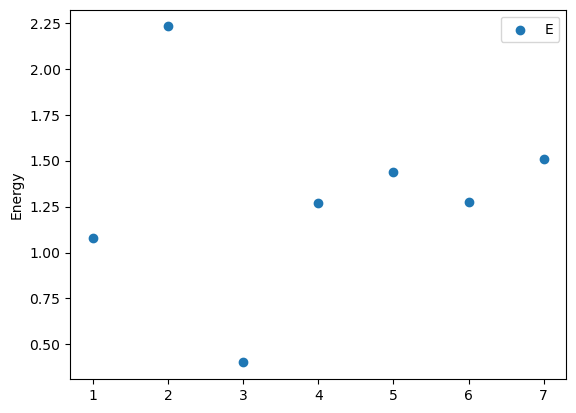

In [67]:
x_values = ['1', '2', '3', '4', '5', '6', '7']

plt.scatter(x_values, E_110, label='E', marker='o')

# plt.plt.ylim(0, 2.1)
# plt.plt.xlim(-5, 15)

plt.ylabel('Energy')
plt.legend()

plt.show()

In [68]:
# 001 symmetric
E_001 = []

gb1 = pr.create.structure.aimsgb.build((0,0,1), 13, (5,-1,0), structure,
                                      uc_a=3, uc_b=3, add_if_dist=1)

gb2 = pr.create.structure.aimsgb.build((0,0,1), 17, (4,1,0), structure,
                                      uc_a=4, uc_b=4, add_if_dist=1)

gb3 = pr.create.structure.aimsgb.build((0,0,1), 5, (3,-1,0), structure,
                                      uc_a=4, uc_b=4, add_if_dist=1)

gb4 = pr.create.structure.aimsgb.build((0,0,1), 5, (2,-1,0), structure,
                                      uc_a=6, uc_b=6, add_if_dist=1)

gb5 = pr.create.structure.aimsgb.build((0,0,1), 17, (5,3,0), structure,
                                      uc_a=4, uc_b=4, add_if_dist=1)

gb6 = pr.create.structure.aimsgb.build((0,0,1), 13, (3,-2,0), structure,
                                      uc_a=6, uc_b=6, add_if_dist=1)

/home/gu.huang/miniconda3/envs/pyiron/lib/python3.12/site-packages/structuretoolkit/build/aimsgb.py:97: UserWarning: `add_if_dist` is deprecated, please use `gap` instead.
  warn("`add_if_dist` is deprecated, please use `gap` instead.")


In [69]:
gb510 = gb1.copy()
gb510 = gb510.repeat([1,1,4])
# x

job = pr.create.job.Lammps('gb510', delete_existing_job=True)
job.structure = gb510
job.potential = potential
job.calc_minimize(pressure=[0.0, None, None, None, None, None])
job.run(delete_existing_job=True)

a,b,c = job.get_structure(-1).get_cell()
A = np.linalg.norm(np.cross(b,c))
e = job.output.energy_tot[-1]
egb = (e-len(gb510)*eFe) / (2*A)
print(len(gb510))
e_gb = egb / ase.units.J * (ase.units.m)**2
E_001.append(e_gb)

The job gb510 was saved and received the ID: 10231
1248


In [70]:
gb410 = gb1.copy()
gb410 = gb410.repeat([1,1,4])
# x

job = pr.create.job.Lammps('gb410', delete_existing_job=True)
job.structure = gb410
job.potential = potential
job.calc_minimize(pressure=[0.0, None, None, None, None, None])
job.run(delete_existing_job=True)

a,b,c = job.get_structure(-1).get_cell()
A = np.linalg.norm(np.cross(b,c))
e = job.output.energy_tot[-1]
egb = (e-len(gb410)*eFe) / (2*A)
print(len(gb410))
e_gb = egb / ase.units.J * (ase.units.m)**2
E_001.append(e_gb)

The job gb410 was saved and received the ID: 10232
1248


In [71]:
gb310 = gb3.copy()
gb310 = gb310.repeat([1,2,4])
# x

job = pr.create.job.Lammps('gb310', delete_existing_job=True)
job.structure = gb310
job.potential = potential
job.calc_minimize(pressure=[0.0, None, None, None, None, None])
job.run(delete_existing_job=True)

a,b,c = job.get_structure(-1).get_cell()
A = np.linalg.norm(np.cross(b,c))
e = job.output.energy_tot[-1]
egb = (e-len(gb310)*eFe) / (2*A)
print(len(gb310))
e_gb = egb / ase.units.J * (ase.units.m)**2
E_001.append(e_gb)

The job gb310 was saved and received the ID: 10233
1280


In [72]:
gb210 = gb4.copy()
gb210 = gb210.repeat([1,3,4])
# x

job = pr.create.job.Lammps('gb210', delete_existing_job=True)
job.structure = gb210
job.potential = potential
job.calc_minimize(pressure=[0.0, None, None, None, None, None])
job.run(delete_existing_job=True)

a,b,c = job.get_structure(-1).get_cell()
A = np.linalg.norm(np.cross(b,c))
e = job.output.energy_tot[-1]
egb = (e-len(gb210)*eFe) / (2*A)
print(len(gb210))
e_gb = egb / ase.units.J * (ase.units.m)**2
E_001.append(e_gb)

The job gb210 was saved and received the ID: 10234
1440


In [73]:
gb530 = gb5.copy()
gb530 = gb530.repeat([1,1,4])
# x

job = pr.create.job.Lammps('gb530', delete_existing_job=True)
job.structure = gb530
job.potential = potential
job.calc_minimize(pressure=[0.0, None, None, None, None, None])
job.run(delete_existing_job=True)

a,b,c = job.get_structure(-1).get_cell()
A = np.linalg.norm(np.cross(b,c))
e = job.output.energy_tot[-1]
egb = (e-len(gb530)*eFe) / (2*A)
print(len(gb530))
e_gb = egb / ase.units.J * (ase.units.m)**2
E_001.append(e_gb)

The job gb530 was saved and received the ID: 10235
2176


In [74]:
gb320 = gb6.copy()
gb320 = gb320.repeat([1,2,4])

job = pr.create.job.Lammps('gb320', delete_existing_job=True)
job.structure = gb320
job.potential = potential
job.calc_minimize(pressure=[0.0, None, None, None, None, None])
job.run(delete_existing_job=True)

a,b,c = job.get_structure(-1).get_cell()
A = np.linalg.norm(np.cross(b,c))
e = job.output.energy_tot[-1]
egb = (e-len(gb320)*eFe) / (2*A)
print(len(gb320))
e_gb = egb / ase.units.J * (ase.units.m)**2
E_001.append(e_gb)

The job gb320 was saved and received the ID: 10236
2496


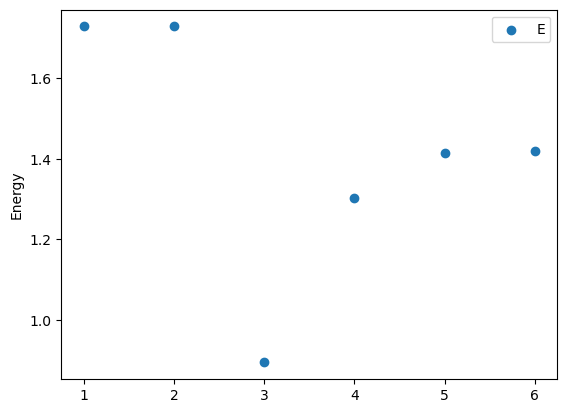

In [75]:
x_values = ['1', '2', '3', '4', '5', '6']

plt.scatter(x_values, E_001, label='E', marker='o')

# plt.plt.ylim(0, 2.1)
# plt.plt.xlim(-5, 15)

plt.ylabel('Energy')
plt.legend()

plt.show()

In [81]:
job = pr.load('gb530')
job.animate_structures()

NGLWidget(max_frame=41)

In [86]:
job_md = pr.create.job.Lammps('md', delete_existing_job=True)

In [87]:
job_md.structure = gb510
job_md.potential = job_md.list_potentials()[0]

In [88]:
job_md.calc_md(initial_temperature=450, temperature=300, pressure=[0.0, None, None, None, None, None])
job_md.run(delete_existing_job=True)

The job md was saved and received the ID: 10237


/home/gu.huang/miniconda3/envs/pyiron/lib/python3.12/site-packages/pyiron_atomistics/lammps/interactive.py:435: SyntaxWarning: invalid escape sequence '\A'
  """
/home/gu.huang/miniconda3/envs/pyiron/lib/python3.12/site-packages/pyiron_atomistics/lammps/base.py:119: SyntaxWarning: invalid escape sequence '\A'
  """
/home/gu.huang/miniconda3/envs/pyiron/lib/python3.12/site-packages/pyiron_atomistics/lammps/output.py:178: SyntaxWarning: invalid escape sequence '\s'
  sep="\s+",
/home/gu.huang/miniconda3/envs/pyiron/lib/python3.12/site-packages/pyiron_atomistics/lammps/output.py:330: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(StringIO(thermo_lines), sep="\s+", engine="c")


ValueError: could not convert string to float: '###'

In [85]:
job_md.animate_structures()

NGLWidget(max_frame=10)